In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def read_csv_file(acc, gyro, mode):
    df_gyro = pd.read_csv(gyro)
    df      = pd.read_csv(acc)
    df.rename(columns = {'X': 'AX', 'Y':'AY', 'Z':'AZ'}, inplace = True)
    df['GX'] = df_gyro['X']
    df['GY'] = df_gyro['Y']
    df['GZ'] = df_gyro['Z']
    
    df['activity'] = mode
    
    return df



In [3]:

acc_file = 'data/car/2018-08-17_16-50-00/AccelerometerLinear.csv'
gyro_file= 'data/car/2018-08-17_16-50-00/Gyroscope.csv'

df = read_csv_file(acc_file, gyro_file, 'car')
print("shape -", df.shape)


shape - (13444, 8)


In [4]:
df = df[1300:9000]
print("shape -", df.shape)
df.head()

shape - (7700, 8)


,Milliseconds,AX,AY,AZ,GX,GY,GZ,activity
1300,26001,0.756334,-0.270321,0.329167,-0.015884,-0.035477,-0.014374,car
1301,26021,0.777000,-0.152301,0.834079,0.078934,-0.156921,-0.019699,car
1302,26041,-0.312069,0.329438,1.350635,-0.048904,-0.012039,-0.016495,car
1303,26062,0.652128,-0.389451,0.200621,0.019272,-0.044006,-0.012238,car
1304,26081,-0.079961,-1.032657,0.233096,-0.043579,0.003937,-0.009048,car


In [5]:
# df['user'].value_counts().plot(kind = 'bar', title = 'counts of activities')

In [6]:
def plot_transportation_mod(transportation_mode, df):
    data = df[df['activity'] == transportation_mode][['AX', 'AY', 'AZ', 'GX', 'GY', 'GZ']][:8000]
    
    axis = data.plot(subplots = True, figsize =(20, 20), title = transportation_mode)
    
    for ax in axis:
        ax.legend(loc = 'lower left', bbox_to_anchor=(1.0,0.5))

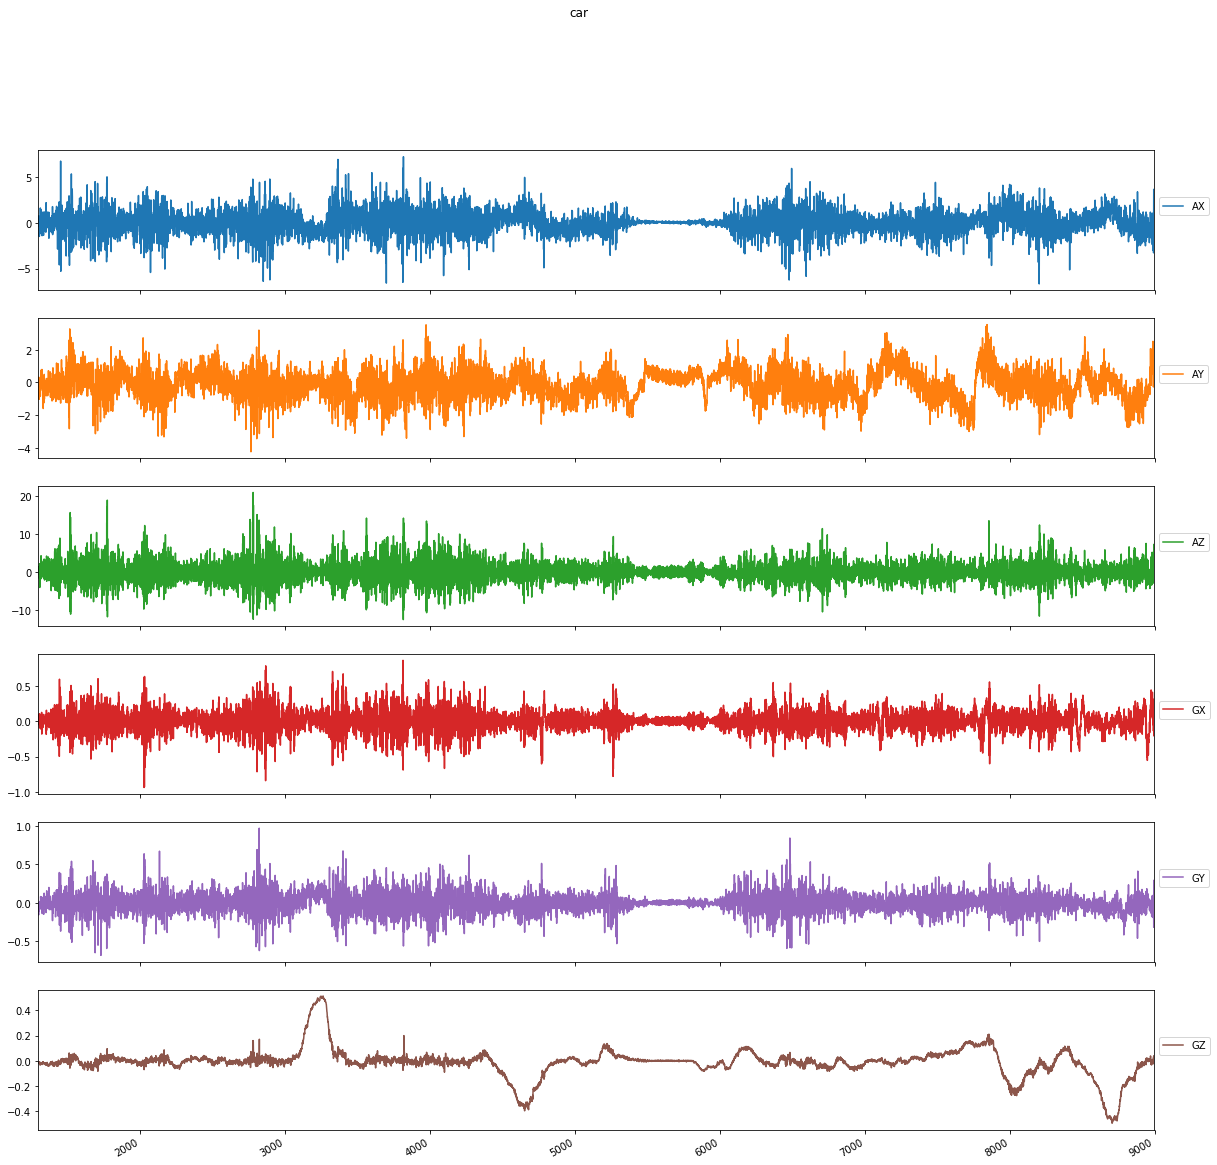

In [7]:
plot_transportation_mod('car', df)

In [8]:
# df['GZ'].plot(figsize=(20,5),title="Z-axis of gyro for Car")

In [15]:
acc_file = 'data/car/2018-08-17_16-43-04/AccelerometerLinear.csv'
gyro_file= 'data/car/2018-08-17_16-43-04/Gyroscope.csv'

df = read_csv_file(acc_file, gyro_file, 'car')
print("shape -", df.shape)


shape - (6646, 8)


In [16]:
df = df[1300:12000]
print("shape -", df.shape)
df.head()

shape - (5346, 8)


,Milliseconds,AX,AY,AZ,GX,GY,GZ,activity
1300,26000,1.310577,-0.599656,-2.653413,-0.030792,-0.118576,-0.002655,car
1301,26020,0.001736,-1.469157,2.047003,-0.094711,0.188217,0.012268,car
1302,26041,-0.361463,-0.839294,0.419466,0.088516,0.030563,0.010132,car
1303,26061,1.720914,-0.621697,0.038787,-0.090454,-0.015244,-0.003723,car
1304,26080,2.569507,-1.287929,-0.327906,-0.049973,-0.208054,-0.003723,car


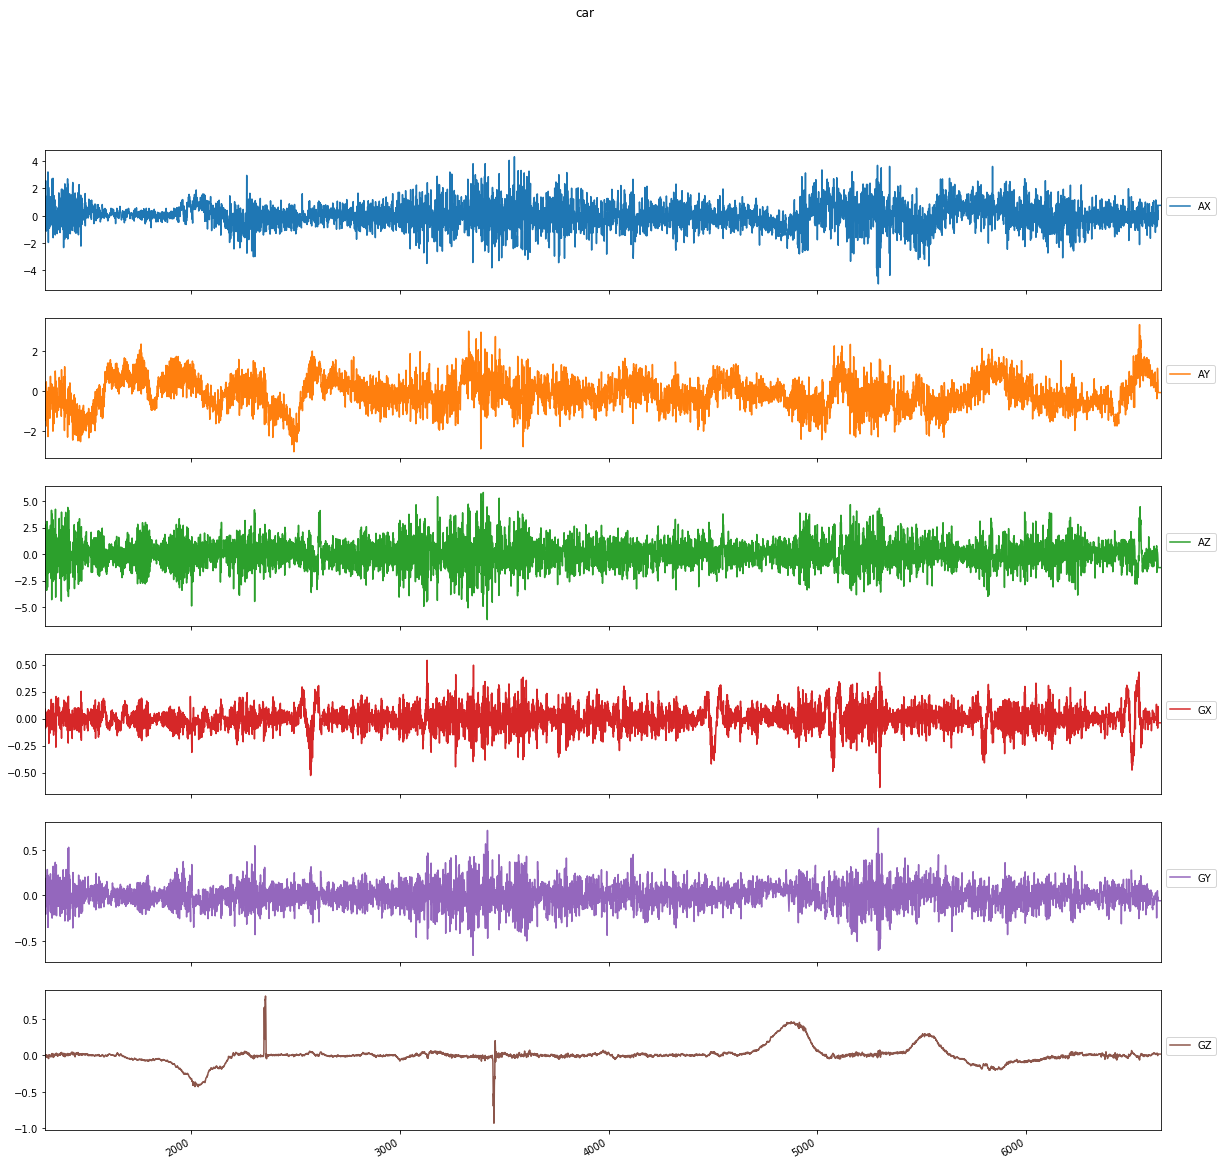

In [17]:
plot_transportation_mod('car', df)

In [18]:
# df['GZ'].plot(figsize=(20,5),title="Z-axis of gyro for Car")
from scipy.ndimage import gaussian_filter
from scipy.fftpack import fft

In [20]:

window_length = 10
df['smooth_AX'] = gaussian_filter(df['AX'], window_length)
df['smooth_AY'] = gaussian_filter(df['AY'], window_length)
df['smooth_AZ'] = gaussian_filter(df['AZ'], window_length)

df['smooth_GX'] = gaussian_filter(df['GX'], window_length)
df['smooth_GY'] = gaussian_filter(df['GY'], window_length)
df['smooth_GZ'] = gaussian_filter(df['GZ'], window_length)


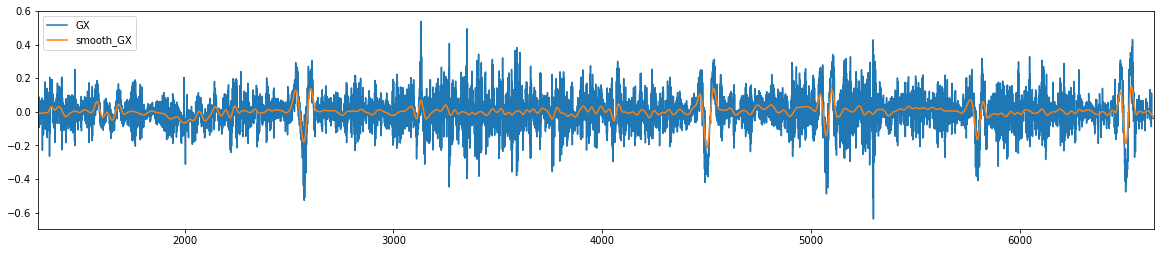

In [22]:
df[['GX', 'smooth_GX']].plot(figsize = (20,4))

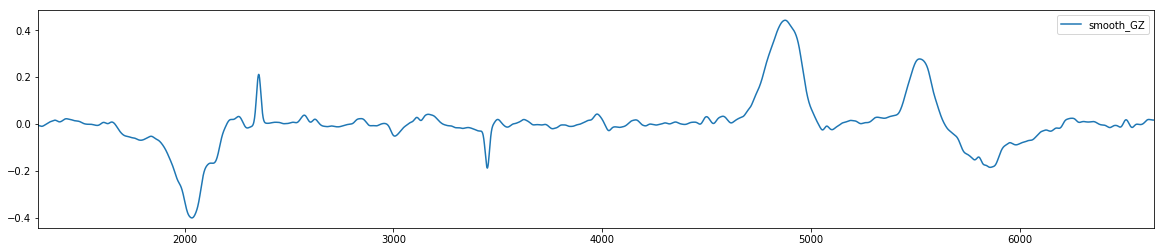

In [24]:
df[['smooth_GZ']].plot(figsize = (20,4))

In [27]:
df.columns

Index(['Milliseconds', 'AX', 'AY', 'AZ', 'GX', 'GY', 'GZ', 'activity',
       'smooth_AX', 'smooth_AY', 'smooth_AZ', 'smooth_GX', 'smooth_GY',
       'smooth_GZ'],
      dtype='object')

In [30]:
fftfeatures = []
features = ['AX', 'AY', 'AZ', 'GX', 'GY', 'GZ']
for i in features:
    reals = np.real(np.fft.rfft(df[i]))
    imagn = np.imag(np.fft.rfft(df[i]))
    
    complexs = [reals[0]]
    n = len(reals)
    if(n%2 == 0):
        complexs.append(imagn[0])
    for j in range(1, n-1):
        complexs.append(reals[j])
        complexs.append(imagn[j])
#     complexs.append(reals[j])
    if( len(df) > len(complexs)):
        complexs.append(imagn[j])
    df['f'+ i] = complexs
    fftfeatures.append('f'+i)

In [31]:
df.columns

Index(['Milliseconds', 'AX', 'AY', 'AZ', 'GX', 'GY', 'GZ', 'activity',
       'smooth_AX', 'smooth_AY', 'smooth_AZ', 'smooth_GX', 'smooth_GY',
       'smooth_GZ', 'fAX', 'fAY', 'fAZ', 'fGX', 'fGY', 'fGZ'],
      dtype='object')

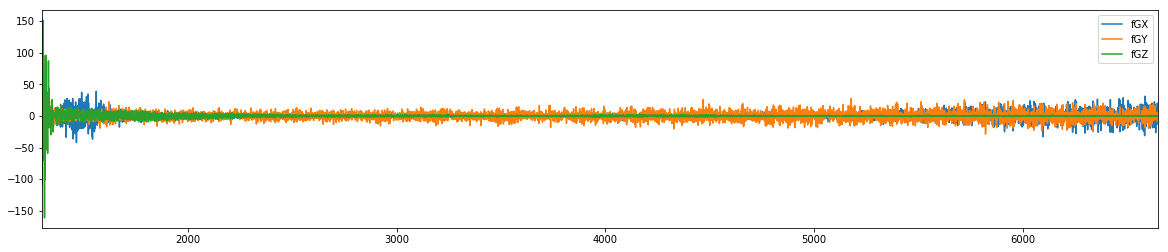

In [35]:
df[['fGX','fGY','fGZ']].plot(figsize = (20,4))

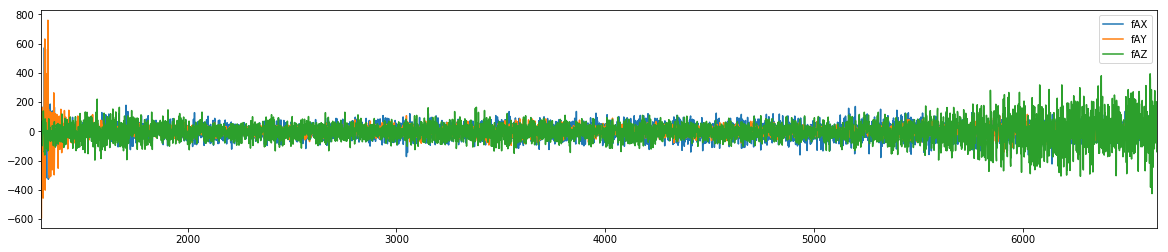

In [36]:
df[['fAX','fAY','fAZ']].plot(figsize = (20,4))